In [1]:
import os
import random
import gc

import torch
import torchvision
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = os.path.abspath(os.path.relpath('../data'))
image_dir = os.path.abspath(os.path.relpath('../doc/images'))

## Convolutional Neural Network

In [3]:
mnist_trainset = datasets.MNIST(root='../data', train=True, download=True,
                                transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()]))

mnist_testset = datasets.MNIST(root='../data', train=False, download=True,
                               transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()]))

In [4]:
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
n_epochs = 3
log_interval = 10

In [5]:
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size_train, True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size_test, True)

In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return F.log_softmax(x, dim=0)

In [14]:
net = Net()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [15]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [16]:
def train(epoch):
    net.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = net(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
            (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
#        torch.save(net.state_dict(), 'model.pth')
#        torch.save(optimizer.state_dict(), 'optimizer.pth')

In [17]:
def test():
    net.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = net(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [18]:
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()


Test set: Avg. loss: 6.9051, Accuracy: 1135/10000 (11%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 4.156699
Train Epoch: 1 [640/60000 (1%)]	Loss: 3.173617
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.896531
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.674652
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.701595
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.600726
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.507766
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.369536
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.301281
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.311075
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.386833
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.248101
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.225583
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.161635
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.231314
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.184886
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.255372
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.180734
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.130721
Train Epoch: 1 [12160

Train Epoch: 2 [44160/60000 (74%)]	Loss: 1.956711
Train Epoch: 2 [44800/60000 (75%)]	Loss: 2.035303
Train Epoch: 2 [45440/60000 (76%)]	Loss: 2.210440
Train Epoch: 2 [46080/60000 (77%)]	Loss: 2.045764
Train Epoch: 2 [46720/60000 (78%)]	Loss: 2.150087
Train Epoch: 2 [47360/60000 (79%)]	Loss: 2.021728
Train Epoch: 2 [48000/60000 (80%)]	Loss: 2.084465
Train Epoch: 2 [48640/60000 (81%)]	Loss: 2.031610
Train Epoch: 2 [49280/60000 (82%)]	Loss: 2.053557
Train Epoch: 2 [49920/60000 (83%)]	Loss: 1.987301
Train Epoch: 2 [50560/60000 (84%)]	Loss: 1.989983
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.392477
Train Epoch: 2 [51840/60000 (86%)]	Loss: 1.972468
Train Epoch: 2 [52480/60000 (87%)]	Loss: 2.083619
Train Epoch: 2 [53120/60000 (88%)]	Loss: 1.966469
Train Epoch: 2 [53760/60000 (90%)]	Loss: 2.275014
Train Epoch: 2 [54400/60000 (91%)]	Loss: 2.007042
Train Epoch: 2 [55040/60000 (92%)]	Loss: 2.095432
Train Epoch: 2 [55680/60000 (93%)]	Loss: 2.106429
Train Epoch: 2 [56320/60000 (94%)]	Loss: 1.999066


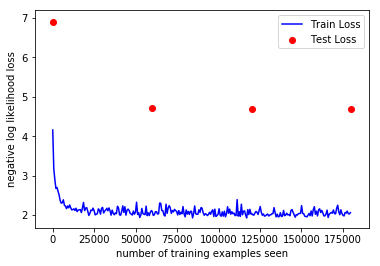

In [19]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()